# <p style = "text-align: center;"> Домашнее задание №2 </p>
### <p style = "text-align: center;"> *Гвоздков Иван, БСЦ214* </p>

## Часть первая, предобработка данных

#### Подготовка к выполнению задания, импорт пакетов, сиды

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification

random.seed(42)
np.random.seed(42)

# Метод seed позволяет зафиксировать вызываемые случайные значения
# То есть, если прописан seed, то программа будет при каждом запуске вызывать одни и те же случайные значения
# Таким образом, результаты работы программы будут каждый раз фиксированные, одинаковые
# То есть, воспроизводимыми на любом устройстве

#### Простейший EDA и обработка признаков

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


#### Случайный набор

In [3]:
# Тренировочный набор данных - используем базу df_train
# Метод sample позволяет вывести случайные значения (в нашем случае - строки набора данных)
# Методу sample на вход подаём требуемое количество случайных значений

df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


#### Верх и низ

In [4]:
# Тестовый набор данных - используем базу df_test
# Методы head и tail выводят верхние и нижние, соответственно, строки набора данных, на вход подаём нужное количество строк

df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [5]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


#### Столбцы с пропусками

In [6]:
# Метод isna будет возврщать T/F в зависимости от пустоты/непустоты ячейки
# Метод any будет возвращать T, если хотя бы один элемент T
# То есть, если в столбце есть хотя бы один пропуск, данное сочетание вернёт этот столбец
# С помощью columns вернутся имена всех таких столбцов с пропусками
# Повторить для df_train и df_test

# Столбцы с пропущенными значениями в df_train

df_train.columns[df_train.isna().any()]

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

In [7]:
# Столбцы с пропущенными значениями в df_test

df_test.columns[df_test.isna().any()]

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

#### Количество полных дубликатов

In [8]:
# Чтобы посмотреть, есть ли дубликаты в данных, можно использовать метод duplicated 
# Чтобы посчитать, применяется метод sum. Если вернётся не ноль, значит дубликаты есть
# Посылка feel = F нужна для того, чтобы метод вывел все дублирующиеся строки

# Поиск дубликатов в df_train  

df_train.duplicated(keep = False).sum()

np.int64(1478)

In [9]:
# Поиск дубликатов в df_test

df_test.duplicated(keep = False).sum()

np.int64(95)

#### Дубликаты без целевой переменной

In [10]:
# Нужно обозначить в subset все столбцы, кроме того, который является целевым

df_train.duplicated(subset = ["name", "year", "km_driven", "fuel", 
                              "seller_type", "transmission", "owner", 
                              "mileage", "engine", "max_power", 
                              "torque", "seats"], keep = False).sum()

np.int64(1799)

In [11]:
df_test.duplicated(subset = ["name", "year", "km_driven", "fuel", 
                             "seller_type", "transmission", "owner", 
                             "mileage", "engine", "max_power", 
                             "torque", "seats"], keep = False).sum()

np.int64(109)

In [12]:
# Теперь без sum, чтобы просто посмотреть на такие строки

print(df_train[df_train.duplicated(subset = ["name", "year", "km_driven", "fuel", 
                                             "seller_type", "transmission", "owner", 
                                             "mileage", "engine", "max_power", 
                                             "torque", "seats"], keep = False)])

                                          name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
22        45000  Petrol  Individual       Manual   First Owner   21.4

In [13]:
print(df_test[df_test.duplicated(subset = ["name", "year", "km_driven", "fuel", 
                                           "seller_type", "transmission", "owner", 
                                           "mileage", "engine", "max_power", 
                                           "torque", "seats"], keep = False)])

                                name  year  selling_price  km_driven    fuel  \
0             Mahindra Xylo E4 BS IV  2010         229999     168000  Diesel   
11                     Lexus ES 300h  2019        5150000      20000  Petrol   
39   Skoda Rapid 1.6 MPI AT Elegance  2016         645000      11000  Petrol   
56                   Maruti Ritz VXi  2012         320000      40000  Petrol   
58            Hyundai i20 Sportz 1.2  2012         300000     120000  Petrol   
..                               ...   ...            ...        ...     ...   
934  Mercedes-Benz S-Class S 350 CDI  2017        6000000      37000  Diesel   
936       BMW X4 M Sport X xDrive20d  2019        5500000       8500  Diesel   
949          Toyota Camry 2.5 Hybrid  2016        2000000      68089  Petrol   
971      Maruti Ertiga SHVS ZDI Plus  2017         750000      50000  Diesel   
984                  Maruti Ritz VDi  2012         300000      70000  Diesel   

          seller_type transmission     

#### Удаление дубликатов и восстановление нумерации

In [14]:
# С помощью drop_duplicates можно очистить набор данных, а с помощью параметра first в keep - оставить только первое вхождение

# Оставляем только первое вхождение дубликата для df_train
df_train.drop_duplicates(subset = ["name", "year", "km_driven", "fuel", 
                                   "seller_type", "transmission", "owner", 
                                   "mileage", "engine", "max_power", 
                                   "torque", "seats"], keep = 'first', inplace = True)

# Оставляем только первое вхождение дубликата для df_test
df_test.drop_duplicates(subset = ["name", "year", "km_driven", "fuel", 
                                  "seller_type", "transmission", "owner", 
                                  "mileage", "engine", "max_power", 
                                  "torque", "seats"], keep = 'first', inplace = True)

In [15]:
# Восстановим индексацию с помощью reset_index

# Восстановление индексации для df_train
df_train.reset_index(drop = True, inplace = True)

# Восстановление индексации для df_test
df_test.reset_index(drop = True, inplace = True)

#### Смена типов данных

In [16]:
# С помощью метода drop с посылкой asix = 1 (по столбцам) можно удалить ненужный столбец из массивов

# Удаление столбца torque из df_train
df_train.drop("torque", inplace = True, axis = 1)

# Удаление столбца torque из df_test
df_test.drop("torque", inplace = True, axis = 1)

In [17]:
# Нужно срезать лишние элементы со строк в переменных mileage, engine и max_power в обоих наборах данных с помощью среза str
# А потом, непосредственно, преобразовать переменные в float
# В переменной max_power из тренировочной выборки есть неправльно заполненное значение, можно назвать его "псевдопустое"
# Чтобы программма работала корректно, нужно изменить это значение, чтобы оно было действительно пустое

# Преобразование перенных в числовые в df_train
df_train["mileage"] = df_train["mileage"].str[:-5].astype(float)
df_train["engine"] = df_train["engine"].str[:-3].astype(float)
df_train["max_power"] = df_train["max_power"].str[:-4].replace('', None).astype(float)

# Преобразование перенных в числовые в df_test
df_test["mileage"] = df_test["mileage"].str[:-5].astype(float)
df_test["engine"] = df_test["engine"].str[:-3].astype(float)
df_test["max_power"] = df_test["max_power"].str[:-4].astype(float)

#### Обработка пропущенных значений

In [18]:
# Теперь можно обработать пропущенные значения, поскольку все 4 переменные, в которых остались пропуски, численные
# С помощью метода fillna можно заменить все пропуски на медианы данных переменных
# Нужно обратит внимание на то, что на тестовой выбор используется медиана по тренировочной выборке
# Это обоснованно тем, что в теоретическом случае у пользователя есть доступ только к тренировочной выборке

# Медиана выбрана, как метрика для замены, поскольку далее проводится линейная регрессия, а медиана минимально искажает модель
# Медиана не реагирует на выбросы, сохраняет общую структуру данных
# Для линейной регресси критичны значения выбросов, поэтому лучше, чтобы замена пропущенных значений никак от них не зависела
# Вполне очевидно, что данные в выборке распределны не нормально, так что медиана - это хороший выбор для замены пропусков

# Кроме того, можно присвоить типы данных int для переменных engine и seats

# Удаление пропусков в df_train и заполнение из медианой из df_train
df_train["engine"] = df_train["engine"].fillna(df_train["engine"].median()).astype(int)
df_train["seats"] = df_train["seats"].fillna(df_train["seats"].median()).astype(int)
df_train["mileage"] = df_train["mileage"].fillna(df_train["mileage"].median()).astype(float)
df_train["max_power"] = df_train["max_power"].fillna(df_train["max_power"].median()).astype(float)

# Удаление пропусков в df_test и заполнение из медианой из df_train
df_test["engine"] = df_test["engine"].fillna(df_train["engine"].median()).astype(int)
df_test["seats"] = df_test["seats"].fillna(df_train["seats"].median()).astype(int)
df_test["mileage"] = df_test["mileage"].fillna(df_train["mileage"].median()).astype(float)
df_test["max_power"] = df_test["max_power"].fillna(df_train["max_power"].median()).astype(float)

In [19]:
# Теперь можно увидеть, что в обоих наборах данных удалены все дубли и в столбцах нет нулевых значений, типы данных верные

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 547.6+ KB


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           931 non-null    object 
 1   year           931 non-null    int64  
 2   selling_price  931 non-null    int64  
 3   km_driven      931 non-null    int64  
 4   fuel           931 non-null    object 
 5   seller_type    931 non-null    object 
 6   transmission   931 non-null    object 
 7   owner          931 non-null    object 
 8   mileage        931 non-null    float64
 9   engine         931 non-null    int64  
 10  max_power      931 non-null    float64
 11  seats          931 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 87.4+ KB


#### Описание числовых переменных, тренировочная выборка

In [21]:
# Описание переменной year

df_train["year"].describe()

count    5840.000000
mean     2013.428425
std         4.095622
min      1983.000000
25%      2011.000000
50%      2014.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

In [22]:
# Описание переменной selling_price

df_train["selling_price"].describe()

count    5.840000e+03
mean     5.229601e+05
std      5.354320e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.050000e+05
75%      6.400000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [23]:
# Описание переменной km_driven

df_train["km_driven"].describe()

count    5.840000e+03
mean     7.395224e+04
std      6.007114e+04
min      1.000000e+00
25%      3.900000e+04
50%      7.000000e+04
75%      1.000000e+05
max      2.360457e+06
Name: km_driven, dtype: float64

In [24]:
# Описание переменной engine

df_train["engine"].describe()

count    5840.000000
mean     1429.448973
std       485.662834
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1498.000000
max      3604.000000
Name: engine, dtype: float64

In [25]:
# Описание переменной seats

df_train["seats"].describe()

count    5840.000000
mean        5.426712
std         0.982344
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        14.000000
Name: seats, dtype: float64

In [26]:
# Описание переменной mileage

df_train["mileage"].describe()

count    5840.000000
mean       19.430841
std         3.985973
min         0.000000
25%        16.950000
50%        19.370000
75%        22.300000
max        42.000000
Name: mileage, dtype: float64

In [27]:
# Описание переменной max_power

df_train["max_power"].describe()

count    5840.000000
mean       87.948422
std        31.577884
min        32.800000
25%        68.000000
50%        81.860000
75%        99.000000
max       400.000000
Name: max_power, dtype: float64

#### Описание числовых переменных, тестовая выборка

In [28]:
# Описание переменной year

df_test["year"].describe()

count     931.000000
mean     2013.506982
std         4.043408
min      1995.000000
25%      2011.000000
50%      2014.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

In [29]:
# Описание переменной selling_price

df_test["selling_price"].describe()

count    9.310000e+02
mean     5.501182e+05
std      5.987156e+05
min      3.100000e+04
25%      2.500000e+05
50%      4.200000e+05
75%      6.500000e+05
max      6.000000e+06
Name: selling_price, dtype: float64

In [30]:
# Описание переменной km_driven

df_test["km_driven"].describe()

count       931.000000
mean      72786.747583
std       48823.924040
min        1303.000000
25%       39000.000000
50%       65000.000000
75%      100000.000000
max      375000.000000
Name: km_driven, dtype: float64

In [31]:
# Описание переменной engine

df_test["engine"].describe()

count     931.000000
mean     1435.484425
std       515.908793
min       624.000000
25%      1196.500000
50%      1248.000000
75%      1498.000000
max      3604.000000
Name: engine, dtype: float64

In [32]:
# Описание переменной seats

df_test["seats"].describe()

count    931.000000
mean       5.409237
std        0.924622
min        4.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        9.000000
Name: seats, dtype: float64

In [33]:
# Описание переменной mileage

df_test["mileage"].describe()

count    931.000000
mean      19.379280
std        3.994487
min        0.000000
25%       16.500000
50%       19.370000
75%       22.320000
max       32.260000
Name: mileage, dtype: float64

In [34]:
# Описание переменной max_power

df_test["max_power"].describe()

count    931.000000
mean      88.561837
std       32.715854
min       34.200000
25%       68.050000
50%       81.860000
75%      100.000000
max      280.000000
Name: max_power, dtype: float64

#### Описание категориальных переменных, тренировочная выборка

In [35]:
# Описание переменной name

df_train["name"].describe()

count                       5840
unique                      1924
top       Maruti Swift Dzire VDI
freq                          91
Name: name, dtype: object

In [36]:
# Описание переменной fuel

df_train["fuel"].describe()

count       5840
unique         4
top       Diesel
freq        3177
Name: fuel, dtype: object

In [37]:
# Описание переменной seller_type

df_train["seller_type"].describe()

count           5840
unique             3
top       Individual
freq            5223
Name: seller_type, dtype: object

In [38]:
# Описание переменной transmission

df_train["transmission"].describe()

count       5840
unique         2
top       Manual
freq        5336
Name: transmission, dtype: object

In [39]:
# Описание переменной owner

df_train["owner"].describe()

count            5840
unique              5
top       First Owner
freq             3603
Name: owner, dtype: object

#### Описание категориальных переменных, тестовая выборка

In [40]:
# Описание переменной name

df_test["name"].describe()

count                     931
unique                    621
top       Maruti Alto 800 LXI
freq                       14
Name: name, dtype: object

In [41]:
# Описание переменной fuel

df_test["fuel"].describe()

count        931
unique         4
top       Diesel
freq         498
Name: fuel, dtype: object

In [42]:
# Описание переменной seller_type

df_test["seller_type"].describe()

count            931
unique             3
top       Individual
freq             813
Name: seller_type, dtype: object

In [43]:
# Описание переменной transmission

df_test["transmission"].describe()

count        931
unique         2
top       Manual
freq         839
Name: transmission, dtype: object

In [44]:
# Описание переменной owner

df_test["owner"].describe()

count             931
unique              5
top       First Owner
freq              562
Name: owner, dtype: object

## Часть вторая, визуализация

#### Pairplot

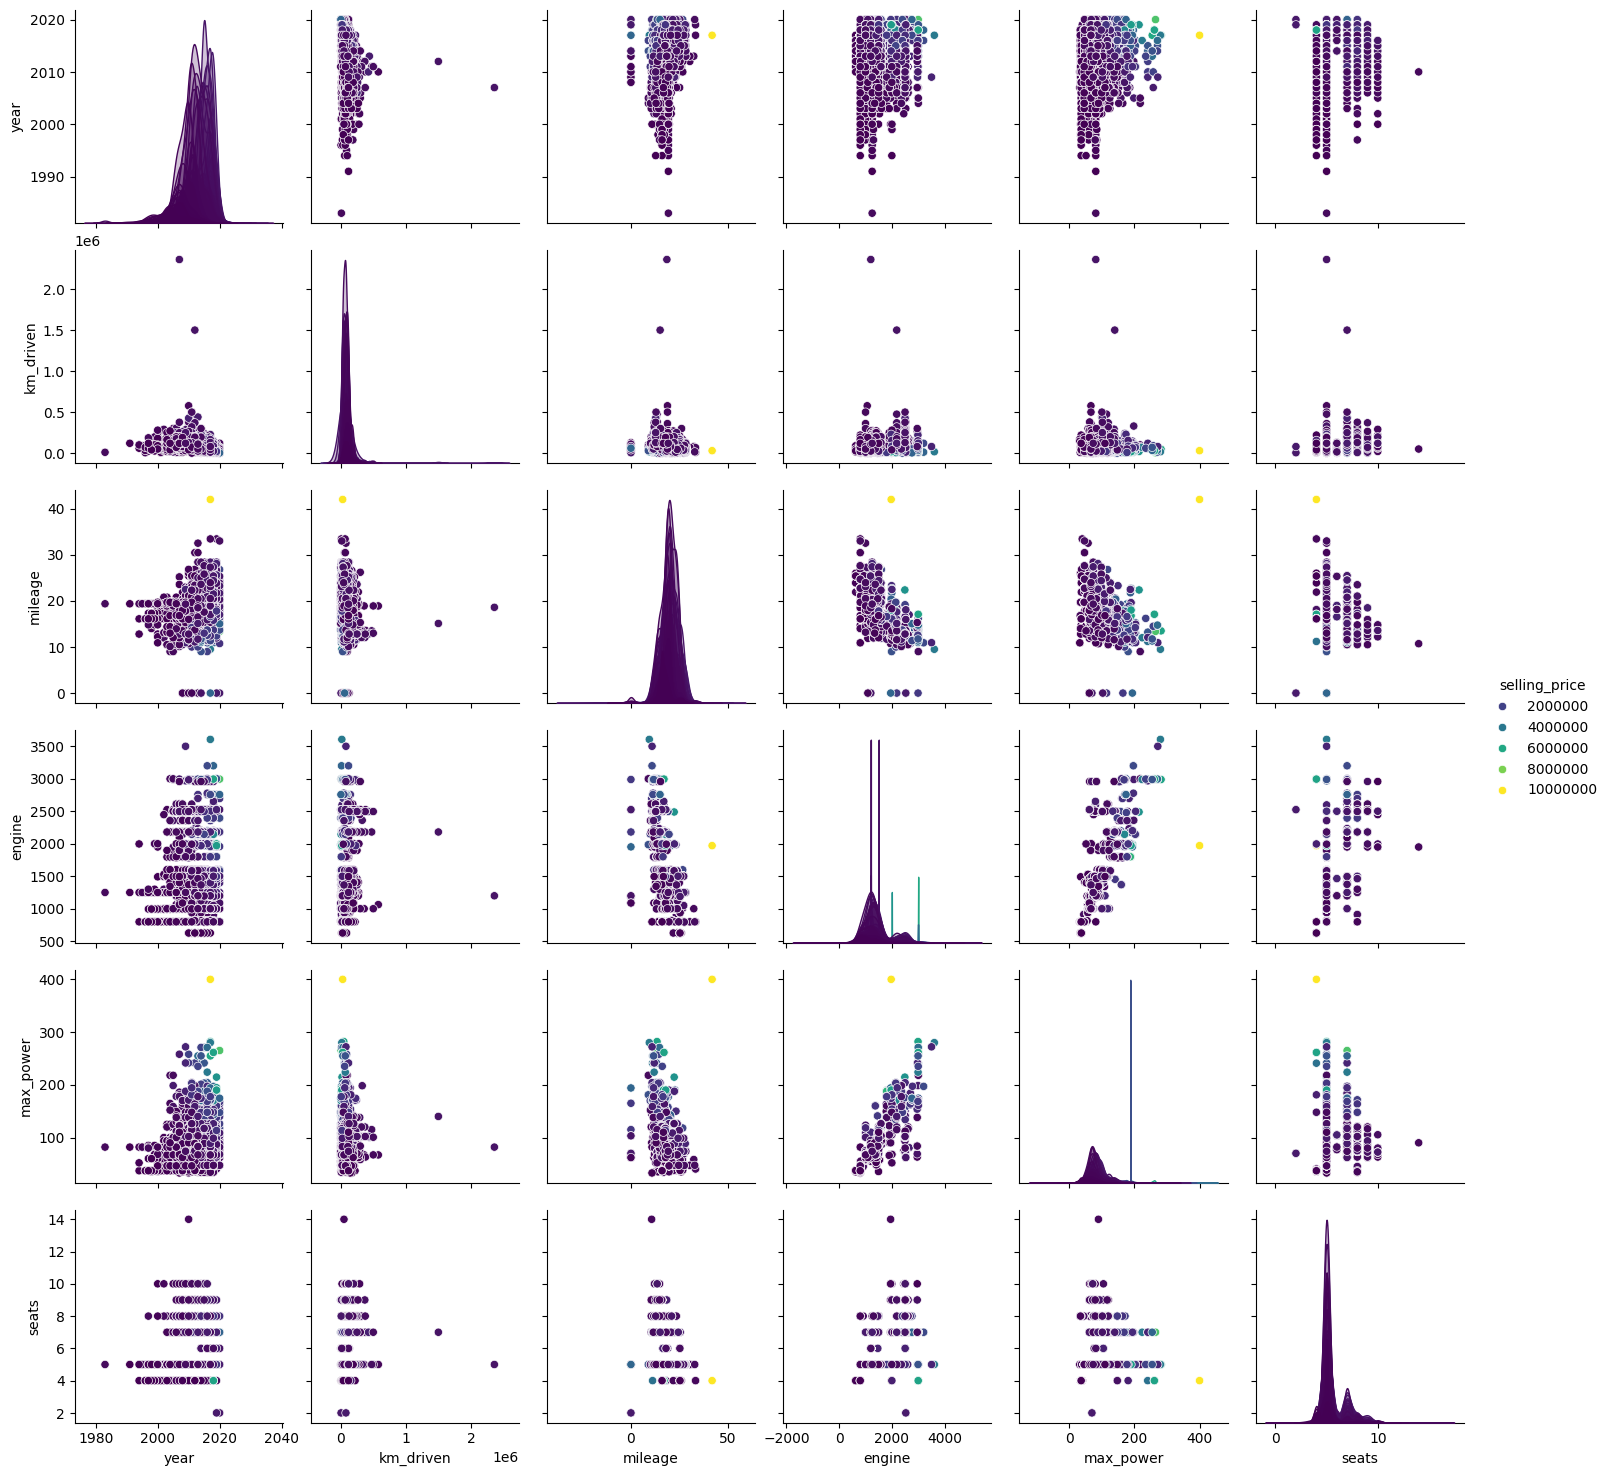

In [45]:
sns.pairplot(df_train, vars = ["year", "km_driven", "mileage", "engine", 
                                "max_power", "seats"], hue = "selling_price", palette = "viridis")
plt.show()

# Связь признаков с целевой переменной предположить нельзя в принципе
# Можно предположить связь комбинаций признаков c целевой переменной
# Но на данных графиках такие связи малопоказательны, с тем же успехом, как на эти графики, можно смотреть просто на набор данных
# Можно было бы предположить связь комбинаций признаков с целевой переменной, если бы заметно менялся цвет при изменении координат
# Здесь же можно увидеть скорее хаотичное и околослучайное распределние, делать на основе такого графика какие-то выводы 
# Это непоказательно и вряд ли корректно

# Что касатеся обычных парных корреляций - судя по графику можно предположить корреляции между следующими парами признаков:
# engine и mileage - слабо-умеренная, отрицательная
# engine и max_power - слабо-умеренная, положительная
# engine и seats - слабо-умеренная, положительная
# seats и mileage - слабо-умеренная, отрицательная

# Однако стоит учитывать, что визуализация - это не предмет точного анализа и лучше опираться на числовые данные

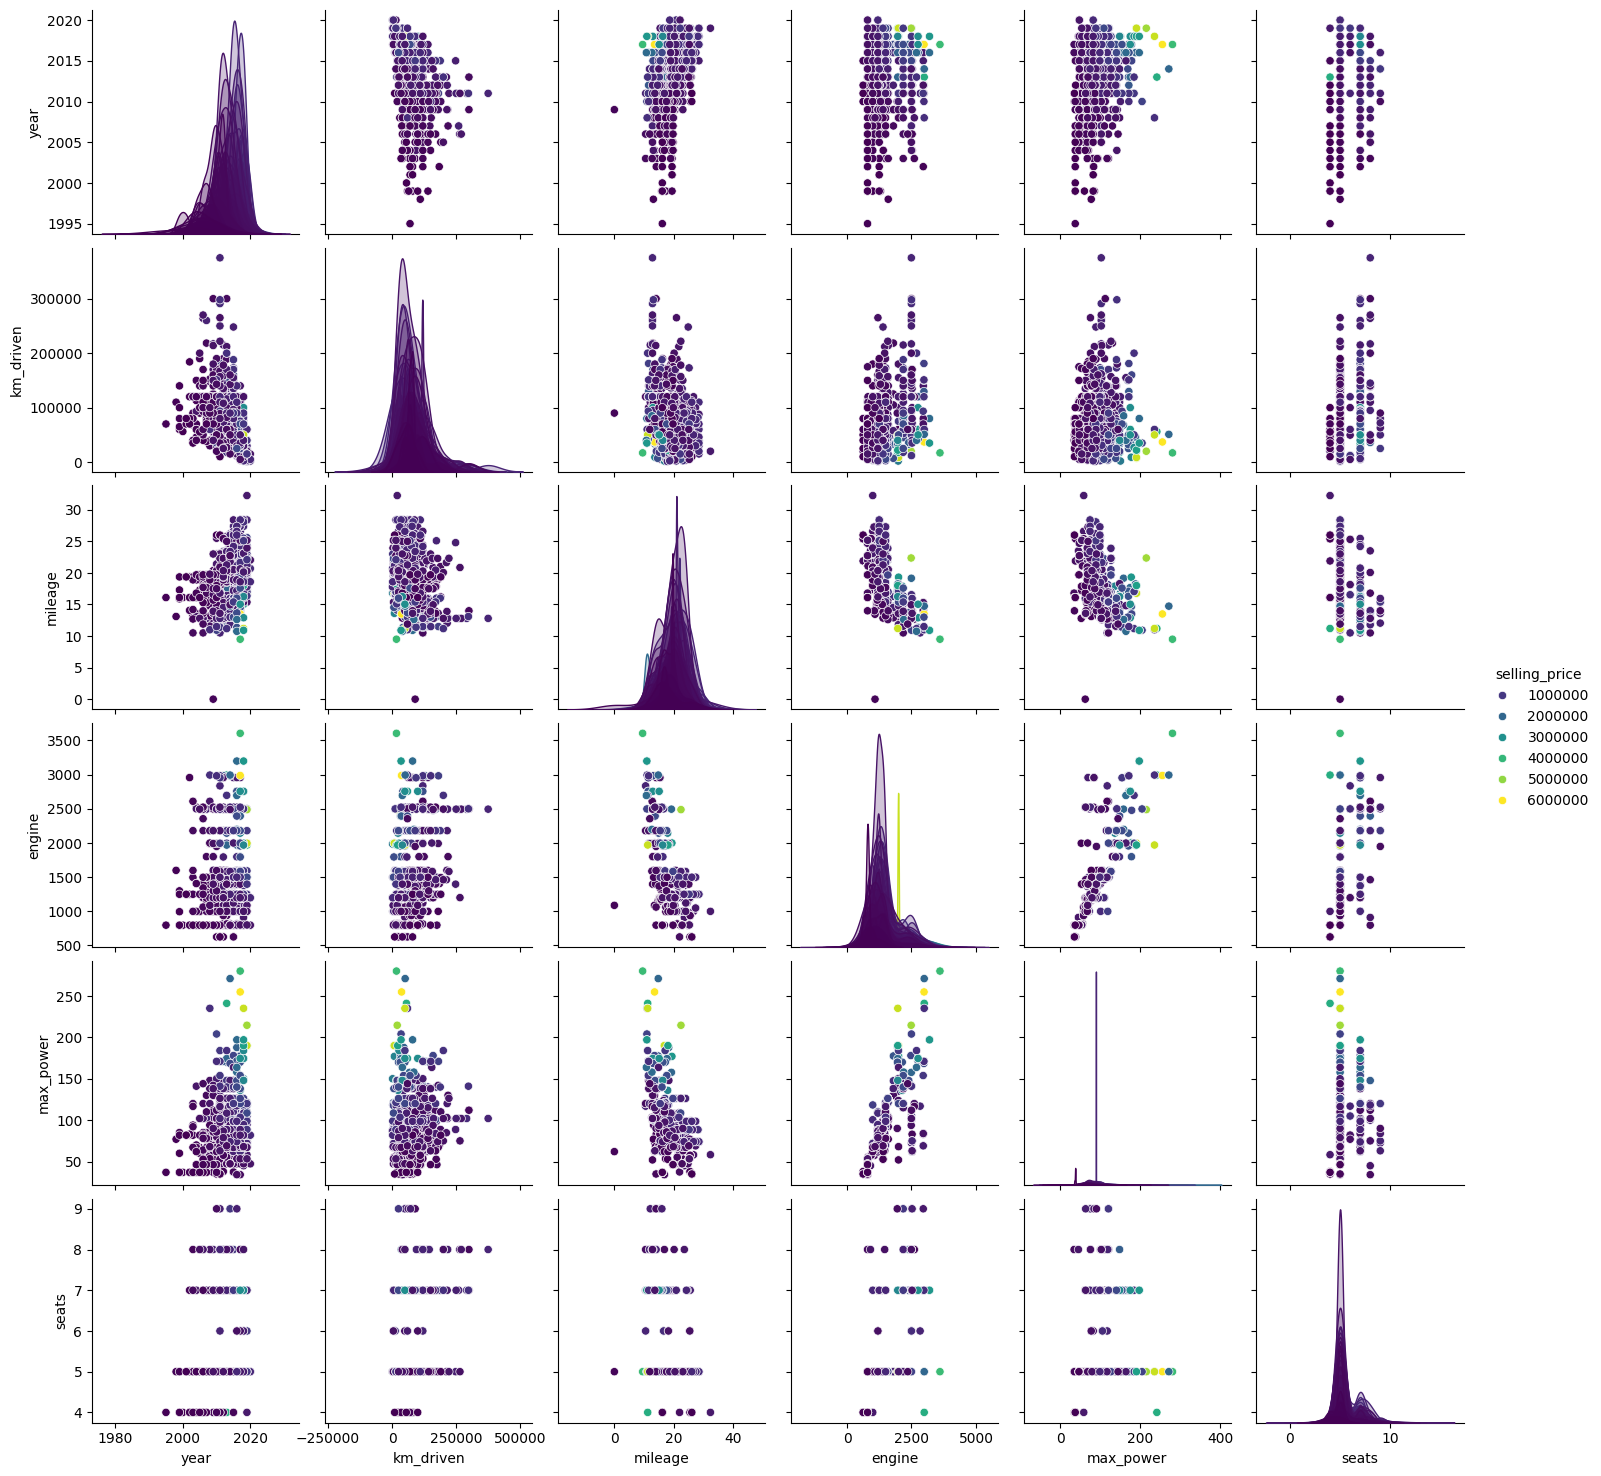

In [46]:
sns.pairplot(df_test, vars = ["year", "km_driven", "mileage", "engine", 
                            "max_power", "seats"], hue = "selling_price", palette = "viridis")
plt.show()

# Совокупности при разделении действительно оказались похожи, но тестовая выборка лучше
# Корреляции в данных в тестовой выборке как будто бы наблюдаются лучше и связи пар признаков с целевой переменной тоже
# Но общие тенденции - не совсем чётко, но во многом сохранились

#### Корреляции

In [47]:
# Для начала нужно добавить числовые переменные в отдельный набор данных
df_train_corr = df_train.loc[:, ["year", "km_driven", "mileage", "engine", "max_power", "seats"]]

# Нужно вывести 5 первых значений, чтобы проверить, что всё сработало корректно
df_train_corr.head(5)

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5


In [48]:
# Теперь можно построить в получившемся наборе данных матрицу корреляций методом corr
df_train_corr.corr()

# Как можно заметить, то, что было принято за слабо-умеренные связи, на самом деле чуть сильнее
# Связи, которые были предположны на графике:
# engine и mileage - -0,57, отрицательная
# engine и max_power - 0,68, положительная
# engine и seats - 0,65, положительная
# seats и mileage - -0,45, отрицательная
# На самом деле скорее средние или даже сильно-средние, однако с направлениями и парами было "угадано"
# Это ещё раз доказывает, что графики не очень показательны для анализа, однако 4 самые сильные корреляции можно было увидеть
# Но на графике это выглядело сильно менее весомо, чем в числовом эквиваленте

,year,km_driven,mileage,engine,max_power,seats
year,1.000000,-0.368966,0.341334,0.002819,0.157138,0.041178
km_driven,-0.368966,1.000000,-0.182086,0.229766,0.024539,0.192328
mileage,0.341334,-0.182086,1.000000,-0.572893,-0.374150,-0.451059
engine,0.002819,0.229766,-0.572893,1.000000,0.681968,0.652172
max_power,0.157138,0.024539,-0.374150,0.681968,1.000000,0.244017
seats,0.041178,0.192328,-0.451059,0.652172,0.244017,1.000000


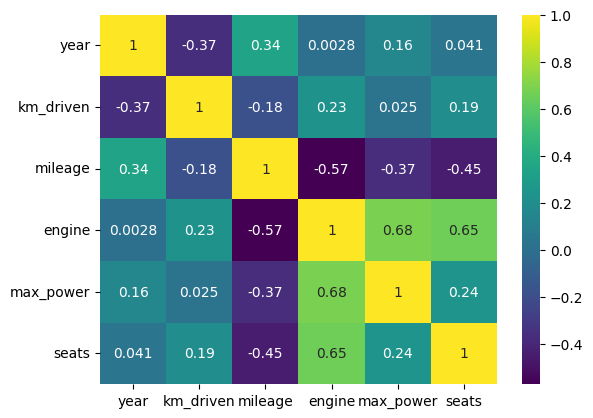

In [49]:
# С помощью heatmap можно построить тепловую карту, чтобы нагляднее увидеть корреляции между признками
sns.heatmap(df_train_corr.corr(), annot = True, cmap = "viridis");

# Наименее скоррелированы признаки max_power и km_driver - 0,025

# Относительно сильная положительная линейная зависимость, наибольшая в данных, наблюдается между признаками:
# engine и max_power - 0,68
# engine и seats - 0,65

# Связь между признаками km_driven и year отрицательная, а значит, с увеличением одного признака падает другой (грубо говоря)
# Значит, вполне корректно утверждать, что, чем меньше год, тем, скорее всего, больше километров пробега в нашей выборке

## Часть третья, модель на вещественных признаках

#### Создание поднаборов

In [50]:
# Создание поднаборов данных для регрессии на вещественных признаках

# Для тренировочной выборки
y_train = df_train.loc[:, ["selling_price"]]
x_train = df_train.loc[:, ["year", "km_driven", "mileage", "engine", "max_power", "seats"]]

# Для тестовой выборки
y_test = df_test.loc[:, ["selling_price"]]
x_test = df_test.loc[:, ["year", "km_driven", "mileage", "engine", "max_power", "seats"]]

#### Построение первоначальной модели

In [51]:
# Построение и обучение модели - делать можно сразу, выборку разделять не нужно, она уже разделена изначально

model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [52]:
# Предсказание значения зависимой переменной на тестовой выборке

y_pred1 = model1.predict(x_test)

In [53]:
# Метрики R^2 и MSE

print(f'R^2 = {r2_score(y_test, y_pred1)}, MSE = {mean_squared_error(y_test, y_pred1)}')

# Значение R^2 =~ 0,6157 говорит о том, что выбранные независимые переменные примерно на 61,57% объясняют цены на машины
# Значение MSE =~ 13,7*10^10 говорит о том, что модель не очень хорошо справляется с предсказанием значений

R^2 = 0.6157157959732436, MSE = 137602717930.7684


#### Стандартизация и построение стандартизованной модели

In [54]:
# Нужно использовать стандартизатор StandardScaler

normalizer = StandardScaler()

In [55]:
# На тренировочном наборе данных нужно обучить модель, поэтому нужно использовать fit_transform

x_train_norm = normalizer.fit_transform(x_train)

In [56]:
# На тестовом наборе данных обучать модель не нужно, поэтому нужно использовать просто transform

x_test_norm = normalizer.transform(x_test)

In [57]:
# Нужно сформировать нормализованные наборы данных
# Сначала для тренировочной выборки

x_train_norm = pd.DataFrame(x_train_norm, columns = x_train.columns)

In [58]:
# Потом для тестовой выборки

x_test_norm = pd.DataFrame(x_test_norm, columns = x_test.columns)

In [59]:
# Можно построить новую модель, но уже со стандартизованными данными, действия те же

model2 = LinearRegression()
model2.fit(x_train_norm, y_train)

LinearRegression()

In [60]:
# Предсказание значения зависимой переменной на тестовой выборке

y_pred2 = model2.predict(x_test_norm)

In [61]:
# Метрики R^2 и MSE

print(f'R^2 = {r2_score(y_test, y_pred2)}, MSE = {mean_squared_error(y_test, y_pred2)}')

# Модель практически не изменилась с точки зрения качества, стала лучше, но на невероятно мизерное значение

R^2 = 0.6157157959732495, MSE = 137602717930.76627


#### Сравнение коэффициентов

In [62]:
# C помощью цикла выведем все коэффициенты модели (я, кстати, не понял, почему коэффициенты - это список списков и долго висел)

i = 0
while i != 6:
    print(f'{x_train_norm.columns[i]} = {model2.coef_[0][i]}')
    i += 1

# Наиболее информативным признаком в предсказании цены является max_power, то есть мощность, коэффициент положительный
# То есть, с увеличением мощность растёт цена

year = 152247.3308687564
km_driven = -44066.1802128398
mileage = 29319.18102634455
engine = 59324.980365272204
max_power = 324496.8578212167
seats = -22159.187866840803


#### Lasso

In [63]:
# Нужно создать и обучить регрессию Lasso, внутрь которой ничего подавать не будем
# В таком случае, автоматическое/стандартное значение alpha будет равно единице

model3 = Lasso()
model3.fit(x_train_norm, y_train)

Lasso()

In [64]:
# Предсказание значения зависимой переменной на тестовой выборке

y_pred3 = model3.predict(x_test_norm)

In [65]:
# Метрики R^2 и MSE

print(f'R^2 = {r2_score(y_test, y_pred3)}, MSE = {mean_squared_error(y_test, y_pred3)}')

# Значения опять же практически не изменились, по-моему даже стали чуть хуже по сравнению с стандартизовнной регрессией

R^2 = 0.6157153430629443, MSE = 137602880106.8025


In [66]:
# C помощью цикла выведем все коэффициенты модели (а здесь уже обычный список, чудеса питона)

i = 0
while i != 6:
    print(f'{x_train_norm.columns[i]} = {model3.coef_[i]}')
    i += 1

# Никакие веса занулены не были
# Возможные причины - недостаточно высокий коэффициент alpha, малое количество признаков (6) и корреляции между признаками

year = 152247.14742735776
km_driven = -44065.05085352651
mileage = 29317.300553834975
engine = 59320.13709400257
max_power = 324497.7518909206
seats = -22156.305245189265


#### Поиск по сетке, Lasso

In [67]:
# Сначала нужно создать Lasso регрессию

model4 = Lasso()

# Теперь нужно задать пространство параметров, будем перебирать alpha
# Эмпирически (методом проб) выяснено, что модель требует больших значений alpha. Проверим диапозон от 1 до 1501 с шагом 10, это 150 значений

param_grid1 = {"alpha": np.arange(1, 1501, 10)}

# Теперь можно задать остальные параметры модели - это 10 фолдов, метод -MSE, созданное пространство параметров
# Поскольку в сетке 10 фолдов, финальное количество вхождений будет 1500 (150*10). то есть будет обучено 1500 моделей

grid_model1 = GridSearchCV(estimator = model4,
                          param_grid = param_grid1,
                          scoring = "neg_mean_squared_error",
                          cv = 10,
                          verbose = 2)

In [68]:
# Запуск перебора по сетке

grid_model1.fit(x_train_norm, y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ...........................................alpha=11; total time=   0.0s
[CV] END ...................................

c:\Users\Светлая Личность\Desktop\HSE, files\4\4.1\P\Файлы\env_for_homeworks\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([   1,   11,   21,   31,   41,   51,   61,   71,   81,   91,  101,
        111,  121,  131,  141,  151,  161,  171,  181,  191,  201,  211,
        221,  231,  241,  251,  261,  271,  281,  291,  301,  311,  321,
        331,  341,  351,  361,  371,  381,  391,  401,  411,  421,  431,
        441,  451,  461,  471,  481,  491,  501,  511,  521,  531,  541,
        551,  561,  571,  581,  591,  601,  611,  621,  631,  641,  651,
        661,  671,  681,  691,  701,  711,  721,  731,  7...
        771,  781,  791,  801,  811,  821,  831,  841,  851,  861,  871,
        881,  891,  901,  911,  921,  931,  941,  951,  961,  971,  981,
        991, 1001, 1011, 1021, 1031, 1041, 1051, 1061, 1071, 1081, 1091,
       1101, 1111, 1121, 1131, 1141, 1151, 1161, 1171, 1181, 1191, 1201,
       1211, 1221, 1231, 1241, 1251, 1261, 1271, 1281, 1291, 1301, 1311,
       1321, 1331, 1341, 1351, 1361, 1371, 1381, 1391, 1401, 1411, 1421,
       1431, 1441, 1451, 1461, 1471, 1481, 1491])},
             scoring='neg_mean_squared_error', verbose=2)

In [69]:
# Теперь можно посмотреть, какое значение будет лучшим

grid_model1.best_params_

# Лучшее значение = 1121, теперь можно посмотреть, какие результаты даёт такая модель

{'alpha': np.int64(1121)}

In [70]:
# Но сначала вынесем результаты лучшей модели отдельно

best_model1 = grid_model1.best_estimator_

In [71]:
# Предсказание значения зависимой переменной на тестовой выборке

y_pred4 = best_model1.predict(x_test_norm)

In [72]:
# Метрики R^2 и MSE

print(f'R^2 = {r2_score(y_test, y_pred4)}, MSE = {mean_squared_error(y_test, y_pred4)}')

# Модель практически не изменилась с точки зрения качества, стала чуть хуже в сравнении с обычным Lasso

R^2 = 0.6151747707512221, MSE = 137796445750.5413


In [73]:
# C помощью цикла выведем все коэффициенты модели

i = 0
while i != 6:
    print(f'{x_train_norm.columns[i]} = {best_model1.coef_[i]}')
    i += 1

# Никакие коэффициенты не занулились    

year = 152004.02395403737
km_driven = -42824.698150955766
mileage = 27275.625234888546
engine = 53998.15899131672
max_power = 325469.8627549603
seats = -18952.129114869942


#### Поиск по сетке, ElasticNet

In [74]:
# Сначала нужно создать ElasticNet регрессию

model5 = ElasticNet()

# Теперь нужно задать пространство параметров, будем перебирать alpha и l1_ratio, который отвечает за сочетание Ridge и Lasso
# Эмпирически (методом проб) было выяснено, что в ElasticNet лучше работют модели с малым alpha 
# Поэтому переберём все значения между нулём и единицей с точностью до двух знаков
# Для l1_ratio переберём тот же диапазон, но с шагом в 0,05
# Таким образом, получается 2000 (20*100) вариантов перебора

param_grid2 = {"alpha": np.arange(0.01, 1.01, 0.01), "l1_ratio": np.arange(0.01, 1.01, 0.05)}

# Теперь можно задать остальные параметры модели - это 10 фолдов, метод -MSE, созданное пространство параметров
# Поскольку в сетке 10 фолдов, финальное количество вхождений будет 20000 (20000*10). то есть будет обучено 20000 моделей

grid_model2 = GridSearchCV(estimator = model5,
                          param_grid = param_grid2,
                          scoring = "neg_mean_squared_error",
                          cv = 10,
                          verbose = 2)

In [75]:
# Запуск перебора по сетке

grid_model2.fit(x_train_norm, y_train)

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........alpha=0.01, l1_ratio=0.060000000000000005; total time=   0.0s
[CV] END ..........alpha=0.01, l1_ratio=0.

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0....63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
                         'l1_ratio': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96])},
             scoring='neg_mean_squared_error', verbose=2)

In [76]:
# Теперь можно посмотреть, какое значение будет лучшим

grid_model2.best_params_

# Лучшее значение alpha = 0,35, лучшее значение l1_ratio = 0,96, теперь можно посмотреть, какие результаты даёт такая модель

{'alpha': np.float64(0.35000000000000003),
 'l1_ratio': np.float64(0.9600000000000001)}

In [77]:
# Но сначала вынесем результаты лучшей модели отдельно

best_model2 = grid_model2.best_estimator_

In [78]:
# Предсказание значения зависимой переменной на тестовой выборке

y_pred5 = best_model2.predict(x_test_norm)

In [79]:
# Метрики R^2 и MSE

print(f'R^2 = {r2_score(y_test, y_pred5)}, MSE = {mean_squared_error(y_test, y_pred5)}')

# Модель стала ещё чуть-чуть хуже

R^2 = 0.6143642834380347, MSE = 138086661314.8928


In [80]:
# C помощью цикла выведем все коэффициенты модели

i = 0
while i != 6:
    print(f'{x_train_norm.columns[i]} = {best_model2.coef_[i]}')
    i += 1

# Никакие коэффициенты не занулились

year = 151467.14964103856
km_driven = -44532.39849680737
mileage = 28390.687889242137
engine = 63749.496022633655
max_power = 317082.37568853627
seats = -23207.25220684839


## Часть четвёртая, добавление категориальности

#### Создание новых поднаборов (категориальные, без name и первых строк)

In [81]:
# Создание поднаборов данных для регрессии на вещественных и категориальных признаках
# Поскольку уже имеются наборы данных, в которых вещественные признаки нормализованы
# Нужно создать новые, в которых произойдёт перекодировка категориальных значений
# А затем объединить их с нормализованным набором данных

# Для тренировочной выборки
y_cat_train = df_train.loc[:, ["selling_price"]]
x_cat_train_start = df_train.loc[:, ["fuel", "seller_type", "transmission", "owner"]]

# Для тестовой выборки
y_cat_test = df_test.loc[:, ["selling_price"]]
x_cat_test_start = df_test.loc[:, ["fuel", "seller_type", "transmission", "owner"]]

In [82]:
# С помощью get_dummies нужно разбить категориальные признаки, удалив первый столбец
# Разреженной матрицы бояться не нужно, можно оставить её так, это не будет ошибкой

# Создание и вывод поднабора данных с разбитыми категориальными переменными на тренировочной выборке
x_cat_train_norm = pd.get_dummies(x_cat_train_start, drop_first = True)
print(x_cat_train_norm.shape)
x_cat_train_norm.head()

(5840, 10)


,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,True,False,False,True,False,True,False,False,False,False
1,True,False,False,True,False,True,False,True,False,False
2,True,False,False,True,False,True,False,False,False,False
3,False,False,True,True,False,True,False,False,False,False
4,False,False,True,True,False,True,False,False,False,False


In [83]:
# Создание и вывод поднабора данных с разбитыми категориальными переменными на тестовой выборке

x_cat_test_norm = pd.get_dummies(x_cat_test_start, drop_first=True)
print(x_cat_test_norm.shape)
x_cat_test_norm.head()


(931, 10)


,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,True,False,False,True,False,True,False,False,False,False
1,True,False,False,True,False,True,False,False,False,False
2,False,False,True,True,False,False,False,False,False,False
3,True,False,False,True,False,True,False,False,False,False
4,False,False,True,True,False,True,False,True,False,False


In [84]:
# Объединение наборов данных: нормализованного категориального и нормализованного вещственного для тренировочной выборки

x_cat_train = pd.concat([x_train_norm, x_cat_train_norm], axis = 1, ignore_index = True)

In [85]:
# Объединение наборов данных: нормализованного категориального и нормализованного вещственного для тестовой выборки

x_cat_test = pd.concat([x_test_norm, x_cat_test_norm], axis = 1, ignore_index = True)

#### Поиск по сетке, Ridge

In [86]:
# Сначала нужно создать Ridge регрессию

model6 = Ridge()

# Теперь нужно задать пространство параметров, будем перебирать alpha
# Эмпирически выяснено (методом проб), что оптимальное значение alpha где-то в районе 100
# Можно перебрать значения от 1 до 200 с шагом 2, это 100 вариантов

param_grid3 = {"alpha": np.arange(1, 200, 2)}

# Теперь можно задать остальные параметры модели - это 10 фолдов, метод R^2, созданное пространство параметров
# Поскольку в сетке 10 фолдов, финальное количество вхождений будет 1000 (100*10). то есть будет обучено 1000 моделей

grid_model3 = GridSearchCV(estimator = model6,
                          param_grid = param_grid3,
                          scoring = "r2",
                          cv = 10,
                          verbose = 2)

In [87]:
grid_model3.fit(x_cat_train, y_cat_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=3; total time=   0.0s
[CV] END ...................................

c:\Users\Светлая Личность\Desktop\HSE, files\4\4.1\P\Файлы\env_for_homeworks\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199])},
             scoring='r2', verbose=2)

In [88]:
# Теперь можно посмотреть, какое значение будет лучшим

grid_model3.best_params_

# Лучшее значение = 121, теперь можно посмотреть, какие результаты даёт такая модель

{'alpha': np.int64(121)}

In [89]:
# Но сначала вынесем результаты лучшей модели отдельно

best_model3 = grid_model3.best_estimator_

In [90]:
# Предсказание значения зависимой переменной на тестовой выборке

y_pred6 = best_model3.predict(x_cat_test)

In [91]:
# Метрики R^2 и MSE

print(f'R^2 = {r2_score(y_cat_test, y_pred6)}, MSE = {mean_squared_error(y_cat_test, y_pred6)}')

# Ура! Наконец-то какие-то результаты! После добавления категориальных признаков качество сильно повысилось, почти на 0,03
# Можем сделать вывод, что добавление категориальных признаков в модель улучшает её качество!

R^2 = 0.6475290803715387, MSE = 126211163571.67975


## Часть пятая, классификация

#### Синтетические данные

In [92]:
# Нужно просто ввести предоставленные искусственные данные

x_log1, y_log1 = make_classification(n_samples = 100000, n_features = 20, n_informative = 10, 
                                   n_redundant = 10, random_state = 42)

x_train_log1, x_test_log1, y_train_log1, y_test_log1 = train_test_split(x_log1, y_log1, test_size = 0.3, random_state = 42)

#### Обучение логистической регрессии, ROC-AUC и PR-AUC

In [93]:
# Создание модели логистической регрессии

lr1 = LogisticRegression()

In [94]:
# Обучение модели логистической регрессии на тренировочных данных

lr1.fit(x_train_log1, y_train_log1)

LogisticRegression()

In [95]:
# Предсказание классификации (первый класс*) зависимой переменной на тестовой выборке

y_prob_log1 = lr1.predict_proba(x_test_log1)[:, 1]

# *вернулся

In [96]:
# Метрика ROC-AUC - это площадь под кривой, построенной на основе True Positive Rate и False Positive Rate
# Построение производится с помощью roc_auc_score

roc_auc1 = roc_auc_score(y_test_log1, y_prob_log1)

roc_auc1

# Значение площади под кривой roc_auc1 близко к единице, что говорит об очень высоком качестве и полноте модели

np.float64(0.9259023377910034)

In [97]:
# Метрика PR-AUC - это площадь под кривой, построенной на основе Precision и Recall
# Построение производится с помощью average_precision_score

pr_auc1 = average_precision_score(y_test_log1, y_prob_log1)

pr_auc1

# Значение площади под кривой pr_auc близко к единице, что говорит об очень высоком качестве и полноте модели

np.float64(0.9249757664368783)

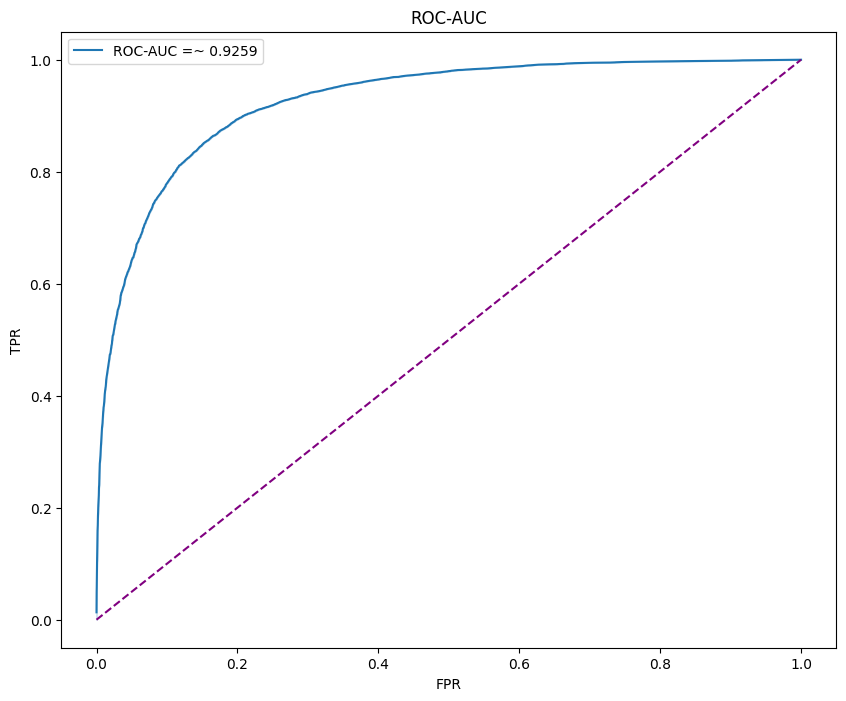

In [98]:
# Построение ROC-AUC
# По сути ничего сложного, устанавливаем значения FPR и TPR, поле размерностью 1*1, подписываем оси, лейбл линии

fpr, tpr, _ = roc_curve(y_test_log1, y_prob_log1)
roc_auc1_df = pd.DataFrame({"FPR": fpr, "TPR": tpr})

plt.figure(figsize = (10, 8))
sns.lineplot(x = 'FPR', y = 'TPR', data = roc_auc1_df, label = "ROC-AUC =~ 0.9259")
plt.plot([0, 1], [0, 1], linestyle = "--", color = "purple")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC")
plt.legend()
plt.show()

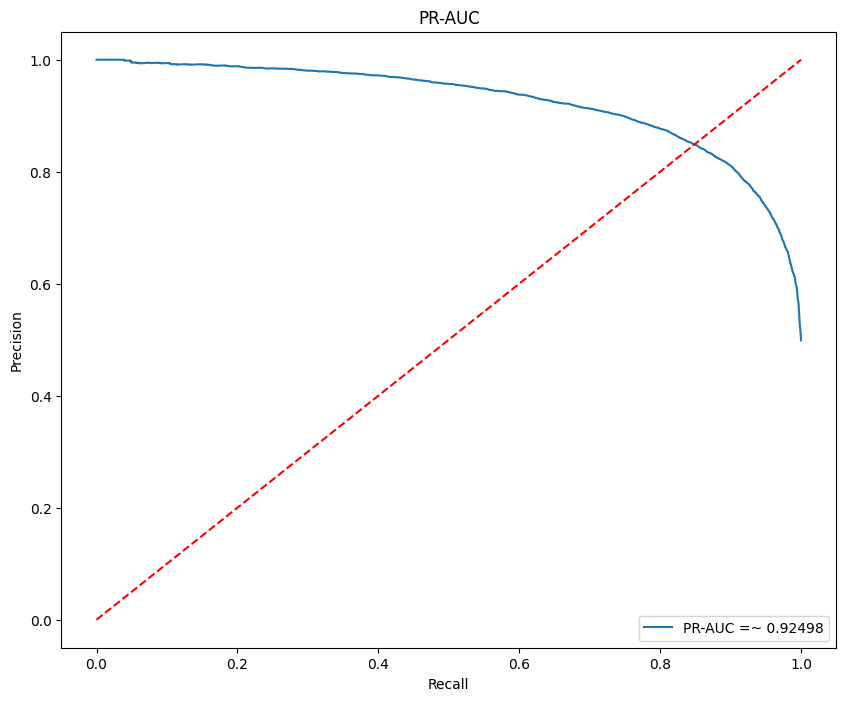

In [99]:
# Построение PR-AUC
# Здесь, соответственно, устанавливаем значения Recall и Precision, всё то же самое, не знаю, что написать про построение графика

precision, recall, _ = precision_recall_curve(y_test_log1, y_prob_log1)
pr_auc1_df = pd.DataFrame({"Recall": recall, "Precision": precision})

plt.figure(figsize = (10, 8))
sns.lineplot(x = "Recall", y = "Precision", data = pr_auc1_df, label = "PR-AUC =~ 0.92498")
plt.plot([0, 1], [0, 1], linestyle = "--", color = "red")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-AUC")
plt.legend()
plt.show()

In [100]:
# Как уже написано выше - результат состоит в том, что модель очень хорошего качества
# Поскольку обе метрики возвращают почти 95% точности
# На графиках это можно увидеть, посмотрев, насколько велика площадь под кривыми ROC и PR, соответственно

#### Реальные данные

In [101]:
# Нужно загрузить данные из файла train.csv и разделить выборку на тренировочную и тестовую

data = pd.read_csv("train.csv", index_col = 0)
target = data.target.values
data = data.drop("target", axis = 1)
x_train_log2, x_test_log2, y_train_log2, y_test_log2 = train_test_split(data, target, test_size = 0.2, random_state = 124)

#### Задача про страховку, построение модели

In [102]:
# Создание модели логистической регрессии
# Методом проб, кстати, выяснено, что модель не сходится за стандартное количество итераций (100), так что увеличим до 10000

lr2 = LogisticRegression(max_iter = 10000)

In [103]:
# Обучение модели логистической регрессии на тренировочных данных
# Дополнительно измерим время обучения модели

start_time1 = time.time()
lr2.fit(x_train_log2, y_train_log2)
end_time1 = time.time()

In [104]:
# Время работы модели

training_time1 = end_time1 - start_time1

In [105]:
# Предсказание зависимой переменной на тренировочной выборке

y_train_pred_log2 = lr2.predict(x_train_log2)

In [106]:
# Предсказание зависимой переменной на тестовой выборке

y_test_pred_log2 = lr2.predict(x_test_log2)

In [107]:
# Предсказание классификации (первый класс) зависимой переменной на тренировочной выборке

y_train_prob_log2 = lr2.predict_proba(x_train_log2)[:, 1]

In [108]:
# Предсказание классификации (первый класс) зависимой переменной на тестовой выборке

y_test_prob_log2 = lr2.predict_proba(x_test_log2)[:, 1]

#### Задача про страховку, метрики тренировочной выборки

In [109]:
# Метрика Accuracy

train_accuracy = accuracy_score(y_train_log2, y_train_pred_log2)
train_accuracy

0.9635150545289592

In [110]:
# Метрика Precision

train_precision = precision_score(y_train_log2, y_train_pred_log2)
train_precision

c:\Users\Светлая Личность\Desktop\HSE, files\4\4.1\P\Файлы\env_for_homeworks\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


np.float64(0.0)

In [111]:
# Метрика Recall

train_recall = recall_score(y_train_log2, y_train_pred_log2)
train_recall

np.float64(0.0)

In [112]:
# Метрика F1

train_f1 = f1_score(y_train_log2, y_train_pred_log2)
train_f1

np.float64(0.0)

In [113]:
# Метрика ROC-AUC

train_roc_auc = roc_auc_score(y_train_log2, y_train_prob_log2)
train_roc_auc

np.float64(0.6220008818870001)

In [114]:
# Метрика PR-AUC

train_pr_auc = average_precision_score(y_train_log2, y_train_prob_log2)
train_pr_auc

np.float64(0.05970080047710646)

In [115]:
# Общий вывод:
# Метрики precision, score и f1 (которая, по сути, является результирующей для первых двух) равны нулю
# Это значит, что модель не предсказывает положительные классы, предсказывает только (0)
# Связано это может быть с тем, что классы несбалансированы или модель плохо сработала из-за сильной разницы в масштабах
# Ведь, как известно, логистическая регрессия чувствительна к масштабу
# Но, судя по тому, что предсказания верны в 96% случаев (об этом говорит метрика accuracy)
# Дело действительно в сильной смещённости данных
# В модели практически не представлены другие примеры, поэтому модель и учится предсказывать класс (0)
# И крайне плохо предсказывает класс (1)

# Что касается кривых - PR-AUC очень низкая - 6% - поскольку она строится на основе precision и score, а они нулевые в этой модели
# ROC-AUC имеет среднее значение, 62%. ROC-AUC показывает, насколько модель хорошо разделяет классы
# А как уже было выяснено, модель предсказывает хорошо только класс (0), поэтому значение ROC-AUC среднее

# По сути, это говорит нам о том, что такая модель отлично подходит, но только для предсказания одного из вариантов
# Если я правильно понимаю условие задачи, то это вариант - не воспользоваться автомобильной страховкой
# То есть, модель будет очень хорошо угадывать тех, кто не воспользуется страховкой
# И вообще не будет угадывать тех, кто воспользуется

#### Задача про страховку, метрики тестовой выборки

In [116]:
# Метрика Accuracy

test_accuracy = accuracy_score(y_test_log2, y_test_pred_log2)
test_accuracy

0.9637021916450358

In [117]:
# Метрика Precision

test_precision = precision_score(y_test_log2, y_test_pred_log2)
test_precision

c:\Users\Светлая Личность\Desktop\HSE, files\4\4.1\P\Файлы\env_for_homeworks\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


np.float64(0.0)

In [118]:
# Метрика Recall

test_recall = recall_score(y_test_log2, y_test_pred_log2)
test_recall

np.float64(0.0)

In [119]:
# Метрика F1

test_f1 = f1_score(y_test_log2, y_test_pred_log2)
test_f1

np.float64(0.0)

In [120]:
# Метрика ROC-AUC

test_roc_auc = roc_auc_score(y_test_log2, y_test_prob_log2)
test_roc_auc

np.float64(0.6271535527795171)

In [121]:
# Метрика PR-AUC

test_pr_auc = average_precision_score(y_test_log2, y_test_prob_log2)
test_pr_auc

np.float64(0.05870448404338892)

In [122]:
# Общий вывод:
# Полученные результаты метрик с точностью до подобия похожи на метрики тренировочной выборки, что логично
# Следовательно, все сделанные выше выводы касательно тренировочной выборки практически идентично релевантны и для тестовой

#### Обработка данных, шкалирование

In [123]:
# Сначала нужно заняться шкалированием. Создадим новые поднаборы данных, в которых нет категориальных признаков
# Для этого - обозначим набор категориальных признаков отдельно

# Для тренировочной выборки
x_cat_train_log2 = [col for col in x_train_log2.columns if "cat" in col]

# Для тестовой выборки
x_cat_test_log2 = [col for col in x_test_log2.columns if "cat" in col]

In [124]:
# Соответственно, создадим поднабор из вещественных переменных, удалив категориальные

# Для тренировочной выборки
x_int_train_log2 = x_train_log2.drop(columns = x_cat_train_log2)

# Для тестовой выборки
x_int_test_log2 = x_test_log2.drop(columns = x_cat_test_log2)

In [125]:
# Нужно использовать стандартизатор StandardScaler

normalizer_log = StandardScaler()

In [126]:
# На тренировочном наборе данных нужно обучить модель, поэтому нужно использовать fit_transform

x_int_train_norm_log2 = normalizer_log.fit_transform(x_int_train_log2)

In [127]:
# На тестовом наборе данных обучать модель не нужно, поэтому нужно использовать просто transform

x_int_test_norm_log2 = normalizer_log.transform(x_int_test_log2)

In [128]:
# Нужно сформировать нормализованные наборы данных
# Сначала для тренировочной выборки

x_int_train_norm_log2 = pd.DataFrame(x_int_train_norm_log2, columns = x_int_train_log2.columns)

In [129]:
# Потом для тестовой выборки

x_int_test_norm_log2 = pd.DataFrame(x_int_test_norm_log2, columns = x_int_test_log2.columns)

#### Обработка данных, OneHot

In [130]:
# Нужно создать OneHotEncoder, который будет работать с категориальными переменными
# Послать в него drop = first, чтобы удалить первые ненужные столбцы для каждой переменной

hot_log2 = OneHotEncoder(drop = "first")

In [131]:
# Нужно обучить перекодировщик на тренировочной выборке

hot_log2.fit(x_train_log2[x_cat_train_log2])

OneHotEncoder(drop='first')

In [132]:
# Теперь можно, непосредственно, изменить данные путём перекодирования
# В этот раз данные сильно больше, пропуски могут повлиять, поэтому с помощью toarray делаем неразреженную матрицу

# Для тренировочной выборки
x_cat_train_norm_log2 = hot_log2.transform(x_train_log2[x_cat_train_log2]).toarray()

In [133]:
# Для тренировочной выборки
x_cat_test_norm_log2 = hot_log2.transform(x_test_log2[x_cat_test_log2]).toarray()

In [134]:
# C помощью get_feature_names_out можно вернуть стобцы, которые будут созданы в результате перекодировки
# А после, с помощью len, можно посчитать, сколько переменных будет создано

feature_names = hot_log2.get_feature_names_out()
len(feature_names)

# Соответственно, будет создано 170 переменных на осонове категориальных переменных в наборе данных

170

In [135]:
# Осталось только с помощью concatenate объединить два набора данных
# Нормализацию вещественных переменных и новые категориальные переменные

# Для тренировочной выборки
x_train_norm_log2 = np.concatenate([x_int_train_norm_log2, x_cat_train_norm_log2], axis = 1)

In [136]:
# Для тестовой выборки

x_test_norm_log2 = np.concatenate([x_int_test_norm_log2, x_cat_test_norm_log2], axis = 1)

#### Логистическая регрессия с нормализацией

In [137]:
# Создание модели логистической регрессии

lr3 = LogisticRegression(max_iter = 10000)

In [138]:
# Обучение модели логистической регрессии на тренировочных данных
# Дополнительно измерим время обучения модели

start_time2 = time.time()
lr3.fit(x_train_norm_log2, y_train_log2)
end_time2 = time.time()

In [139]:
# Время работы модели

training_time2 = end_time2 - start_time2

In [140]:
# Теперь можно замерить разницу в обучении моделей (в секундах)
# В прошлой модели не было разделения категориальных переменных и масштабирования вещественных

delta = training_time2 - training_time1
delta

-150.98518896102905

In [141]:
# Предсказание зависимой переменной на тренировочной выборке

y_train_pred_log3 = lr3.predict(x_train_norm_log2)

In [142]:
# Предсказание зависимой переменной на тестовой выборке

y_test_pred_log3 = lr3.predict(x_test_norm_log2)

In [143]:
# Предсказание классификации (первый класс) зависимой переменной на тренировочной выборке

y_train_prob_log3 = lr3.predict_proba(x_train_norm_log2)[:, 1]

In [144]:
# Предсказание классификации (первый класс) зависимой переменной на тестовой выборке

y_test_prob_log3 = lr3.predict_proba(x_test_norm_log2)[:, 1]

#### Метрики тренировочной выборки

In [145]:
# Метрика Accuracy

train_accuracy2 = accuracy_score(y_train_log2, y_train_pred_log3)
train_accuracy2

0.9635150545289592

In [146]:
# Метрика Precision

train_precision2 = precision_score(y_train_log2, y_train_pred_log3)
train_precision2

c:\Users\Светлая Личность\Desktop\HSE, files\4\4.1\P\Файлы\env_for_homeworks\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


np.float64(0.0)

In [147]:
# Метрика Recall

train_recall2 = recall_score(y_train_log2, y_train_pred_log3)
train_recall2

np.float64(0.0)

In [148]:
# Метрика F1

train_f12 = f1_score(y_train_log2, y_train_pred_log3)
train_f12

np.float64(0.0)

In [149]:
# Метрика ROC-AUC

train_roc_auc2 = roc_auc_score(y_train_log2, y_train_prob_log3)
train_roc_auc2

np.float64(0.6332871692433137)

In [150]:
# Метрика PR-AUC

train_pr_auc2 = average_precision_score(y_train_log2, y_train_prob_log3)
train_pr_auc2

np.float64(0.06564828650976279)

In [151]:
# Общий вывод:

# В принципе, мало что изменилось. Немного повысились метрики качества модели
# Accuracy, ROC и PR выросли примерно на 0.01, то есть, модель стала лучше
# Однако, модель всё ещё предсказывает только (0), но не предсказывает (1)
# Собственно, это обойти и нельзя было бы, поскольку это проблема нестабильных данных, а не анализа

#### Метрики тестовой выборки

In [152]:
# Метрика Accuracy

test_accuracy2 = accuracy_score(y_test_log2, y_test_pred_log3)
test_accuracy2

0.9637021916450358

In [153]:
# Метрика Precision

test_precision2 = precision_score(y_test_log2, y_test_pred_log3)
test_precision2

c:\Users\Светлая Личность\Desktop\HSE, files\4\4.1\P\Файлы\env_for_homeworks\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


np.float64(0.0)

In [154]:
# Метрика Recall

test_recall2 = recall_score(y_test_log2, y_test_pred_log3)
test_recall2

np.float64(0.0)

In [155]:
# Метрика F1

test_f12 = f1_score(y_test_log2, y_test_pred_log3)
test_f12

np.float64(0.0)

In [156]:
# Метрика ROC-AUC

test_roc_auc2 = roc_auc_score(y_test_log2, y_test_prob_log3)
test_roc_auc2

np.float64(0.6377540694542991)

In [157]:
# Метрика PR-AUC

test_pr_auc2 = average_precision_score(y_test_log2, y_test_prob_log3)
test_pr_auc2

np.float64(0.06329023318780386)

In [158]:
# Общий вывод:

# Всё так же, как на тренировочной выборке
# Общее качество немного выросло, однако всё ещё предсказываются только (0), но не (1)
# Как сказано выше, это проблема данных, а не анализа, номинально модель стала лучше, но это значит только то, что...
# ...модель теперь чуть-чуть лучше предсказывает... Нулевые значения

#### Поиск по сетке, логистическая регрессия

In [159]:
# Чтобы пройтись по сетке, сначала нужно задать, какие значения параметра alpha мы будем перебирать
# Просмотрим значения от 10^-4 до 10^10, распределим равномерно между этими значениями 10 точек

param_log = {"alpha": np.logspace(-4, 10, 10)}

In [160]:
# Нужно создать модель логистической регрессии с классификатором
# Выборка будет разделена на 5 частей, максимальное количество итераций = 30

lr4 = GridSearchCV(SGDClassifier(max_iter = 30), param_log, cv = 5)

In [161]:
# Обучение модели

lr4.fit(x_train_norm_log2, y_train_log2)

GridSearchCV(cv=5, estimator=SGDClassifier(max_iter=30),
             param_grid={'alpha': array([1.00000000e-04, 3.59381366e-03, 1.29154967e-01, 4.64158883e+00,
       1.66810054e+02, 5.99484250e+03, 2.15443469e+05, 7.74263683e+06,
       2.78255940e+08, 1.00000000e+10])})

In [162]:
# Теперь можно посмотреть, какое значение будет лучшим

lr4.best_params_

# Лучшее значение alpha = 0.0001, теперь можно посмотреть, какие результаты даёт такая модель

{'alpha': np.float64(0.0001)}

In [163]:
# Но сначала вынесем результаты лучшей модели отдельно

best_model_log = lr4.best_estimator_

In [164]:
# Предсказание зависимой переменной на тренировочной выборке

y_train_pred_log4 = best_model_log.predict(x_train_norm_log2)

In [165]:
# Предсказание зависимой переменной на тестовой выборке

y_test_pred_log4 = best_model_log.predict(x_test_norm_log2)

#### Метрики качества, последний раз, тренировочная

In [166]:
# Метрика Accuracy

train_accuracy3 = accuracy_score(y_train_log2, y_train_pred_log4)
train_accuracy3

0.9633365464782462

In [167]:
# Метрика Precision

train_precision3 = precision_score(y_train_log2, y_train_pred_log4)
train_precision3

np.float64(0.05263157894736842)

In [168]:
# Метрика Recall

train_recall3 = recall_score(y_train_log2, y_train_pred_log4)
train_recall3

np.float64(0.00028780291256547515)

In [169]:
# Метрика F1

train_f13 = f1_score(y_train_log2, y_train_pred_log4)
train_f13

np.float64(0.000572475383558507)

In [170]:
# Общий вывод:

# Модель качественно не отличается от предыдущей модели, Accuracy не изменилась, предсазывается всё ещё только (0)

#### Метрики качества, последний раз, тестовая

In [171]:
# Метрика Accuracy

test_accuracy3 = accuracy_score(y_test_log2, y_test_pred_log4)
test_accuracy3

0.963508984148585

In [172]:
# Метрика Precision

test_precision3 = precision_score(y_test_log2, y_test_pred_log4)
test_precision3

np.float64(0.07407407407407407)

In [173]:
# Метрика Recall

test_recall3 = recall_score(y_test_log2, y_test_pred_log4)
test_recall3

np.float64(0.0004628558204119417)

In [174]:
# Метрика F1

test_f13 = f1_score(y_test_log2, y_test_pred_log4)
test_f13

np.float64(0.0009199632014719411)

In [175]:
# Общий вывод:

# Аналогично тренировочной выборке
# Модель качественно не отличается от предыдущей модели, Accuracy не изменилась, предсазывается всё ещё только (0)